<p style="text-align: center"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read data from file

In [2]:
df = pd.read_csv("adult_eda.csv")
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12.0,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9.0,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9.0,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9.0,Never-married,Adm-clerical,NaN,White,Male,0,0,20,United-States,<=50K


# Try to undersstand what the data looks like? What are types of the features? Are there any missing values? Do I need to eliminate some features?  

In [3]:
df.head()


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
df.shape

(32561, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32561 non-null  int64  
 1   workclass       32561 non-null  object 
 2   fnlwgt          32561 non-null  int64  
 3   education       32561 non-null  object 
 4   education-num   31759 non-null  float64
 5   marital-status  32561 non-null  object 
 6   occupation      32561 non-null  object 
 7   relationship    27493 non-null  object 
 8   race            32561 non-null  object 
 9   sex             32561 non-null  object 
 10  capital-gain    32561 non-null  int64  
 11  capital-loss    32561 non-null  int64  
 12  hours-per-week  32561 non-null  int64  
 13  native-country  32561 non-null  object 
 14  salary          32561 non-null  object 
dtypes: float64(1), int64(5), object(9)
memory usage: 3.7+ MB


In [6]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,31759.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.082843,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.576172,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [7]:
df.isnull().sum()

age                  0
workclass            0
fnlwgt               0
education            0
education-num      802
marital-status       0
occupation           0
relationship      5068
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country       0
salary               0
dtype: int64

---
---

# Look at the value counts of columns that have object datatype and replace '?' like values with 'Unknown' word.  

In [8]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'salary'],
      dtype='object')

In [9]:
df.describe(include=[np.object])

C:\Users\USER\AppData\Local\Temp/ipykernel_56004/127470446.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df.describe(include=[np.object])


,workclass,education,marital-status,occupation,relationship,race,sex,native-country,salary
count,32561,32561,32561,32561,27493,32561,32561,32561,32561
unique,9,16,7,15,5,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


In [10]:
#look at workclass column here
df.workclass.value_counts() 

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [11]:
df[df['workclass']=='?']

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
27,54,?,180211,Some-college,10.0,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
61,32,?,293936,7th-8th,4.0,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K
69,25,?,200681,Some-college,10.0,Never-married,?,NaN,White,Male,0,0,40,United-States,<=50K
77,67,?,212759,10th,6.0,Married-civ-spouse,?,Husband,White,Male,0,0,2,United-States,<=50K
106,17,?,304873,10th,6.0,Never-married,?,NaN,White,Female,34095,0,32,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32530,35,?,320084,Bachelors,13.0,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,>50K
32531,30,?,33811,Bachelors,13.0,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
32539,71,?,287372,Doctorate,NaN,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
32541,41,?,202822,HS-grad,9.0,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K


In [12]:
#replace all '?' in whole df with 'Unknown'
df[df['workclass']=='?'] = df[df['workclass']=='?'].replace('?', 'Unknown')
df.workclass.value_counts() 

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
Unknown              1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [13]:
df.sample(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
20988,50,Private,128478,HS-grad,9.0,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,70,United-States,<=50K
8877,27,Private,204788,HS-grad,9.0,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K
23184,29,Private,370242,Some-college,10.0,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
11082,33,Private,177675,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,Germany,>50K
1846,21,Unknown,163665,Some-college,10.0,Never-married,Unknown,NaN,White,Female,0,0,40,United-States,<=50K


---
---

# Do education and education_num columns hold similar information? If so drop the appropriate choice between them.

In [14]:
df.education.sample(5)

11823         HS-grad
30199    Some-college
9796          HS-grad
17739    Some-college
32308    Some-college
Name: education, dtype: object

In [15]:
df['education-num'].sample(5)

4099      9.0
4239     10.0
29737     6.0
26049     9.0
20274     9.0
Name: education-num, dtype: float64

In [16]:
df.groupby('education')['education-num'].value_counts()

education     education-num
10th          6.0                916
11th          7.0               1146
12th          8.0                424
1st-4th       2.0                161
5th-6th       3.0                330
7th-8th       4.0                631
9th           5.0                503
Assoc-acdm    12.0              1044
Assoc-voc     11.0              1343
Bachelors     13.0              5247
Doctorate     16.0               405
HS-grad       9.0              10215
Masters       14.0              1687
Preschool     1.0                 50
Prof-school   15.0               559
Some-college  10.0              7098
Name: education-num, dtype: int64

In [17]:
df["education-num"].value_counts().sort_values(ascending=False)

9.0     10215
10.0     7098
13.0     5247
14.0     1687
11.0     1343
7.0      1146
12.0     1044
6.0       916
4.0       631
15.0      559
5.0       503
8.0       424
16.0      405
3.0       330
2.0       161
1.0        50
Name: education-num, dtype: int64

In [18]:
#drop one of them here
df.drop("education-num", axis=1).sample(5)

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
29833,28,Private,160981,Some-college,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,52,United-States,<=50K
1869,32,Self-emp-not-inc,298332,Bachelors,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,45,United-States,>50K
3176,49,Private,160647,Bachelors,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,40,United-States,>50K
15088,53,Private,218311,HS-grad,Divorced,Sales,Not-in-family,White,Female,0,0,35,United-States,<=50K
2647,50,Private,273536,7th-8th,Married-civ-spouse,Sales,Husband,Other,Male,0,0,49,Dominican-Republic,<=50K


In [19]:
df.isnull().sum()

age                  0
workclass            0
fnlwgt               0
education            0
education-num      802
marital-status       0
occupation           0
relationship      5068
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country       0
salary               0
dtype: int64

---
---

# Take a look at correlation between variables and also see if there are some outliers in any of the columns.

In [20]:
df.corr()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076646,0.035791,0.077674,0.057775,0.068756
fnlwgt,-0.076646,1.000000,-0.043711,0.000432,-0.010252,-0.018768
education-num,0.035791,-0.043711,1.000000,0.123682,0.079795,0.147748
capital-gain,0.077674,0.000432,0.123682,1.000000,-0.031615,0.078409
capital-loss,0.057775,-0.010252,0.079795,-0.031615,1.000000,0.054256
hours-per-week,0.068756,-0.018768,0.147748,0.078409,0.054256,1.000000


In [21]:
aa = df.describe()
aa

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,31759.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.082843,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.576172,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [22]:
#age column
IQRage = aa.loc["75%", "age"] - aa.loc["25%", "age"]
IQRage

20.0

In [23]:
upper_limage= (IQRage*1.5) + aa.loc["75%", "age"]
upper_limage

78.0

In [24]:
df[df["age"] >=   **code here**  ]["age"].value_counts()d

SyntaxError: invalid syntax (Temp/ipykernel_56004/1403767478.py, line 1)

In [25]:
df["age"].sample(5)

13319    28
30963    34
26617    33
1699     54
13459    35
Name: age, dtype: int64

In [ ]:
fig ,ax = plt.subplots(2,3,figsize=(20,7))
x = 0
y = 0
for column in df.select_dtypes('number').columns:
    
    df[column].plot(kind = "box", ax = ax[x,y])
    if y < 2:
        y += 1
    else:
        x += 1
        y = 0

In [26]:
df[(df["hours-per-week"] == 99)].sample(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
22557,55,Self-emp-not-inc,95149,Some-college,10.0,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,99,United-States,<=50K
19997,72,Private,268861,7th-8th,4.0,Widowed,Other-service,Not-in-family,White,Female,0,0,99,?,<=50K
23226,51,Self-emp-not-inc,88528,Assoc-acdm,12.0,Divorced,Exec-managerial,Unmarried,White,Female,0,0,99,United-States,<=50K
30610,51,Self-emp-not-inc,24790,Some-college,10.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,99,United-States,>50K
32469,58,Self-emp-inc,181974,Doctorate,16.0,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,99,?,<=50K
21056,64,Local-gov,142166,HS-grad,9.0,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,99,United-States,<=50K
18881,43,Private,249771,HS-grad,9.0,Married-civ-spouse,Transport-moving,Husband,Asian-Pac-Islander,Male,0,0,99,United-States,<=50K
19731,34,Federal-gov,345259,Doctorate,16.0,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,99,United-States,<=50K
27764,38,Self-emp-not-inc,152621,Bachelors,13.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,99,United-States,<=50K
1172,25,Private,404616,Masters,14.0,Married-civ-spouse,Farming-fishing,Not-in-family,White,Male,0,0,99,United-States,>50K


In [27]:
#hours per week column
Q1 = df['hours-per-week'].quantile(0.25)
Q3 = df['hours-per-week'].quantile(0.75)
IQRhour = Q3-Q1
IQRhour 

5.0

In [28]:
upper_limhour= IQRhour*1.5 + Q3
upper_limhour

52.5

In [29]:
# find outlier values which extends the upper limit in both age and hours-per-week columns
df[(df['hours-per-week']>=upper_limhour) & (df['age']>=upper_limage)]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
3777,80,Private,87518,Some-college,10.0,Never-married,Prof-specialty,Not-in-family,White,Male,0,1816,60,United-States,<=50K
5370,90,Local-gov,227796,Masters,14.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,20051,0,60,United-States,>50K
7481,83,Private,195507,HS-grad,9.0,Widowed,Protective-serv,Not-in-family,White,Male,0,0,55,United-States,<=50K
7720,84,Private,241065,Masters,14.0,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,66,United-States,<=50K
8806,90,Private,87372,Prof-school,15.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,20051,0,72,United-States,>50K
10546,78,Unknown,33186,7th-8th,4.0,Married-civ-spouse,Unknown,Husband,White,Male,0,0,60,United-States,<=50K
11996,90,Private,40388,Bachelors,13.0,Never-married,Exec-managerial,Not-in-family,White,Male,0,0,55,United-States,<=50K
12830,81,Private,201398,Masters,14.0,Widowed,Prof-specialty,Unmarried,White,Male,0,0,60,?,<=50K
15356,90,Private,90523,HS-grad,9.0,Widowed,Transport-moving,Unmarried,White,Male,0,0,99,United-States,<=50K
24395,83,Self-emp-inc,153183,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,2392,55,United-States,>50K


# After looking at the outliers you can drop the rows which actually does not make any sense. 
** Hint: You can check age and hours per week columns. **

In [30]:
drop_index=df.index[(df['hours-per-week']>=upper_limhour) & (df['age']>=upper_limage)]
drop_index

Int64Index([3777, 5370, 7481, 7720, 8806, 10546, 11996, 12830, 15356, 24395], dtype='int64')

In [31]:
df.drop(drop_index, axis=0) 
df.sample(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
10646,50,Private,72351,Bachelors,13.0,Divorced,Sales,Not-in-family,White,Male,0,0,45,United-States,<=50K
11333,48,Local-gov,78859,HS-grad,9.0,Never-married,Exec-managerial,NaN,White,Female,0,0,40,United-States,<=50K
17252,47,Private,27624,Assoc-voc,11.0,Never-married,Other-service,Not-in-family,White,Female,0,0,55,United-States,<=50K
17392,59,Private,155976,HS-grad,9.0,Widowed,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K
22546,45,Private,102559,Assoc-voc,11.0,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,Canada,>50K


In [ ]:
# check outlier values which extends the upper limit in both age and hours-per-week columns

# Impute missing values in relationship column with 'Unmarried'. Also replace 'Not-in-family','Other-relative' values in this column with 'Unmarried'?

In [32]:
df.relationship.value_counts()

Husband           13193
Not-in-family      8305
Unmarried          3446
Wife               1568
Other-relative      981
Name: relationship, dtype: int64

In [33]:
df["relationship"].replace(to_replace=[np.nan, 'Other-relative', 'Not-in-family',], value='Unmarried', inplace=True)

In [34]:
df.relationship.value_counts()

Unmarried    17800
Husband      13193
Wife          1568
Name: relationship, dtype: int64

---
# How many of each race are represented in this dataset?
---

In [35]:
race_count = df.race.value_counts()
race_count

White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64

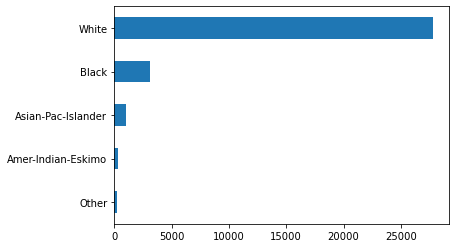

In [36]:
race_count.sort_values().plot.barh();

---
# What is the average age of men/women?
---

In [37]:
average_age_men =df[df.sex=='Male']['age'].mean()
average_age_men

39.43354749885268

In [38]:
round(average_age_men,1)

39.4

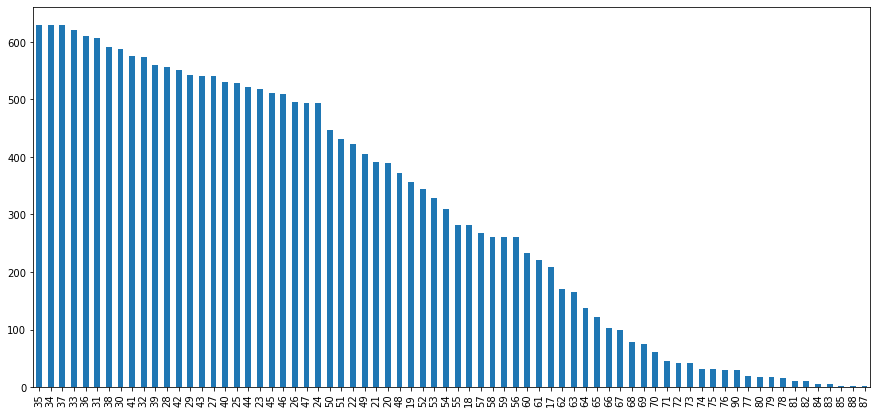

In [39]:
plt.figure(figsize = (15,7))
df.loc[df["sex"] == "Male", "age"].value_counts().plot.bar();

In [40]:
average_age_women = df[df.sex=='Female']['age'].mean()
average_age_women 

36.85823043357163

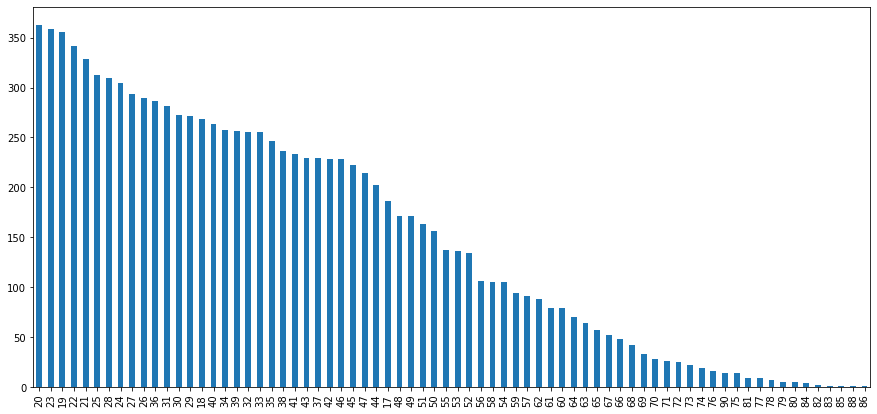

In [41]:
plt.figure(figsize = (15,7))
df.loc[df["sex"] == "Female", "age"].value_counts().plot.bar();

---
# What is the percentage of people who have a Bachelor's degree?
---

In [42]:
df.sample(5)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
21670,38,Private,97759,12th,8.0,Never-married,Other-service,Unmarried,White,Female,0,0,17,United-States,<=50K
17430,32,Local-gov,223267,HS-grad,9.0,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,<=50K
26649,26,Private,190650,Bachelors,13.0,Never-married,Adm-clerical,Unmarried,Asian-Pac-Islander,Male,0,0,40,Taiwan,<=50K
32391,55,Private,199763,HS-grad,9.0,Separated,Protective-serv,Unmarried,White,Male,0,0,81,United-States,<=50K
23225,50,Self-emp-not-inc,95949,Bachelors,13.0,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,50,United-States,<=50K


In [43]:
df.groupby("education")["education"].value_counts()

education     education   
10th          10th              933
11th          11th             1175
12th          12th              433
1st-4th       1st-4th           168
5th-6th       5th-6th           333
7th-8th       7th-8th           646
9th           9th               514
Assoc-acdm    Assoc-acdm       1067
Assoc-voc     Assoc-voc        1382
Bachelors     Bachelors        5355
Doctorate     Doctorate         413
HS-grad       HS-grad         10501
Masters       Masters          1723
Preschool     Preschool          51
Prof-school   Prof-school       576
Some-college  Some-college     7291
Name: education, dtype: int64

In [44]:
df["education"].value_counts()

HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64

In [45]:
upper =len(df[df.education=='Bachelors'])

lower =len(df.education)

percentage_bachelors = upper / lower * 100

percentage_bachelors

16.44605509658794

In [46]:
df["education"].value_counts(normalize=True)

HS-grad         0.322502
Some-college    0.223918
Bachelors       0.164461
Masters         0.052916
Assoc-voc       0.042443
11th            0.036086
Assoc-acdm      0.032769
10th            0.028654
7th-8th         0.019840
Prof-school     0.017690
9th             0.015786
12th            0.013298
Doctorate       0.012684
5th-6th         0.010227
1st-4th         0.005160
Preschool       0.001566
Name: education, dtype: float64

In [47]:
percentage_bachelors = df["education"].value_counts(normalize=True).loc["Bachelors"]*100
round(percentage_bachelors,1)

16.4

In [48]:
print(f"The percentage of people who have a Bachelor's degree : %{round(percentage_bachelors,1)}")

The percentage of people who have a Bachelor's degree : %16.4


---
# What percentage of people with advanced education (`Bachelors`, `Masters`, or `Doctorate`) make more than 50K?
---

In [49]:
df.salary.value_counts()

<=50K    24720
>50K      7841
Name: salary, dtype: int64

In [50]:
df.education.value_counts()

HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64

In [51]:
higher_education = (df['education']=='Bachelors') | (df['education']=='Masters') | (df['education']=='Doctorate')
higher_education

0         True
1         True
2        False
3        False
4         True
         ...  
32556    False
32557    False
32558    False
32559    False
32560    False
Name: education, Length: 32561, dtype: bool

In [52]:
df_high_edu =df[(df['education']=='Bachelors') | (df['education']=='Masters') | (df.education=='Doctorate')]

df_high_edu

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13.0,Never-married,Adm-clerical,Unmarried,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
4,28,Private,338409,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14.0,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
8,31,Private,45781,Masters,14.0,Never-married,Prof-specialty,Unmarried,White,Female,14084,0,50,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32538,38,Private,139180,Bachelors,13.0,Divorced,Prof-specialty,Unmarried,Black,Female,15020,0,45,United-States,>50K
32539,71,Unknown,287372,Doctorate,NaN,Married-civ-spouse,Unknown,Husband,White,Male,0,0,10,United-States,>50K
32544,31,Private,199655,Masters,14.0,Divorced,Other-service,Unmarried,Other,Female,0,0,30,United-States,<=50K
32553,32,Private,116138,Masters,14.0,Never-married,Tech-support,Unmarried,Asian-Pac-Islander,Male,0,0,11,Taiwan,<=50K


In [53]:
df_high_edu[df_high_edu.salary=='>50K']

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
8,31,Private,45781,Masters,14.0,Never-married,Prof-specialty,Unmarried,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
11,30,State-gov,141297,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,>50K
19,43,Self-emp-not-inc,292175,Masters,14.0,Divorced,Exec-managerial,Unmarried,White,Female,0,0,45,United-States,>50K
20,40,Private,193524,Doctorate,16.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,60,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32533,54,Private,337992,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,Asian-Pac-Islander,Male,0,0,50,Japan,>50K
32536,34,Private,160216,Bachelors,13.0,Never-married,Exec-managerial,Unmarried,White,Female,0,0,55,United-States,>50K
32538,38,Private,139180,Bachelors,13.0,Divorced,Prof-specialty,Unmarried,Black,Female,15020,0,45,United-States,>50K
32539,71,Unknown,287372,Doctorate,NaN,Married-civ-spouse,Unknown,Husband,White,Male,0,0,10,United-States,>50K


In [54]:
count = len(df_high_edu[df_high_edu.salary=='>50K'])

In [55]:
perc_high_edu = count / len(df)  
perc_high_edu

0.10706059396210191

In [56]:
print(f"Percentage of people with advanced education make more than 50K : {round(perc_high_edu * 100, 2)}")

Percentage of people with advanced education make more than 50K : 10.71


---
# What percentage of people without advanced education make more than 50K?
---

In [57]:
lower_education = (df['education']!='Bachelors') & (df['education']!='Masters') & (df.education!='Doctorate')

In [58]:
df_low_edu = df[lower_education]
df_low_edu

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
2,38,Private,215646,HS-grad,9.0,Divorced,Handlers-cleaners,Unmarried,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5.0,Married-spouse-absent,Other-service,Unmarried,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
10,37,Private,280464,Some-college,10.0,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12.0,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9.0,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9.0,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9.0,Never-married,Adm-clerical,Unmarried,White,Male,0,0,20,United-States,<=50K


In [59]:
df_low_edu[df_low_edu.salary=='>50K']

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
7,52,Self-emp-not-inc,209642,HS-grad,9.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
10,37,Private,280464,Some-college,10.0,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K
14,40,Private,121772,Assoc-voc,NaN,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,?,>50K
27,54,Unknown,180211,Some-college,10.0,Married-civ-spouse,Unknown,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
38,31,Private,84154,Some-college,NaN,Married-civ-spouse,Sales,Husband,White,Male,0,0,38,?,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32518,57,Local-gov,110417,HS-grad,9.0,Married-civ-spouse,Craft-repair,Husband,White,Male,99999,0,40,United-States,>50K
32519,46,Private,364548,Some-college,10.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,48,United-States,>50K
32545,39,Local-gov,111499,Assoc-acdm,12.0,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,20,United-States,>50K
32557,40,Private,154374,HS-grad,9.0,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K


In [60]:
count =len(df_low_edu[df_low_edu.salary=='>50K'])
count

4355

In [61]:
perc_low_edu = count / len(df)
print(f"Percentage of people without advanced education make more than 50K : {round(perc_low_edu * 100 ,2)}")

Percentage of people without advanced education make more than 50K : 13.37


In [62]:
if perc_high_edu > perc_low_edu :
    print("More education more money!")
else:
    print("Education has no clear effet on salary. You should investigate some other features also.")

Education has no clear effet on salary. You should investigate some other features also.


---
# What percentage of the people who work the minimum number of hours per week have a salary of >50K?
---

In [63]:
df['hours-per-week'].value_counts()

40    15217
50     2819
45     1824
60     1475
35     1297
      ...  
82        1
92        1
87        1
74        1
94        1
Name: hours-per-week, Length: 94, dtype: int64

In [64]:
lazy_riches = df['hours-per-week']==1
lazy_riches

0        False
1        False
2        False
3        False
4        False
         ...  
32556    False
32557    False
32558    False
32559    False
32560    False
Name: hours-per-week, Length: 32561, dtype: bool

In [65]:
df[(df['hours-per-week']==1) & (df.salary=='>50K')]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
189,58,State-gov,109567,Doctorate,16.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,1,United-States,>50K
20072,65,Unknown,76043,HS-grad,9.0,Married-civ-spouse,Unknown,Husband,White,Male,0,0,1,United-States,>50K


In [66]:
num_lazy_riches = len(df[(df['hours-per-week']==1) & (df.salary=='>50K')])
num_lazy_riches

2

In [67]:
num_min_workers = len(df[df['hours-per-week']==1])
num_min_workers

20

In [68]:
print (f"Percentage of the people who work the minimum number of hours per week have a salary of >50K : % {round(num_lazy_riches/num_min_workers*100)}")

Percentage of the people who work the minimum number of hours per week have a salary of >50K : % 10


 ---
 # What country has the highest percentage of people that earn >50K?
 ---


In [69]:
country_salary_df =df.groupby("native-country")[["salary"]].count()
country_salary_df.sample(5)

,salary
native-country,
Hungary,13
Scotland,12
Nicaragua,34
Guatemala,64
Vietnam,67


In [70]:
country_salary_df_riches = df[df.salary=='>50K'].groupby("native-country")[["salary"]].count()
country_salary_df_riches.sample(5)


,salary
native-country,
India,40
Iran,18
United-States,7171
Guatemala,3
Philippines,61


In [ ]:
rich_per_country =
rich_per_country

In [ ]:
#use iloc here

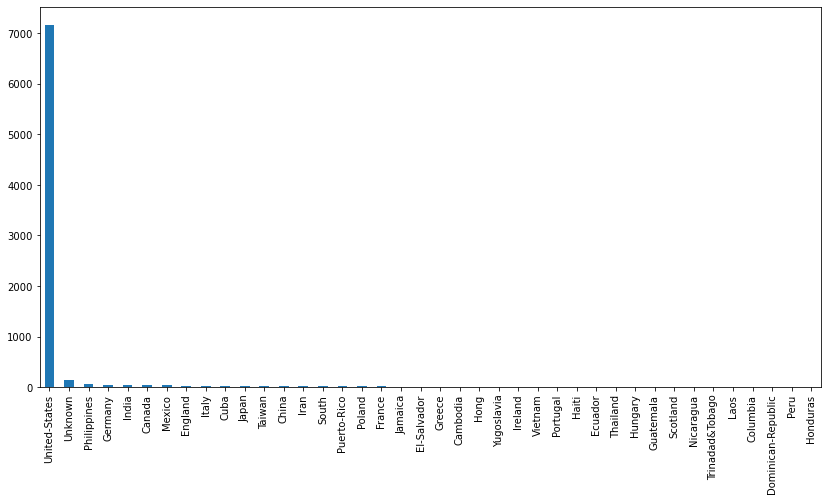

In [76]:
plt.figure(figsize=(14,7))
df.loc[df["salary"] == ">50K", "native-country"].value_counts().plot(kind="bar");

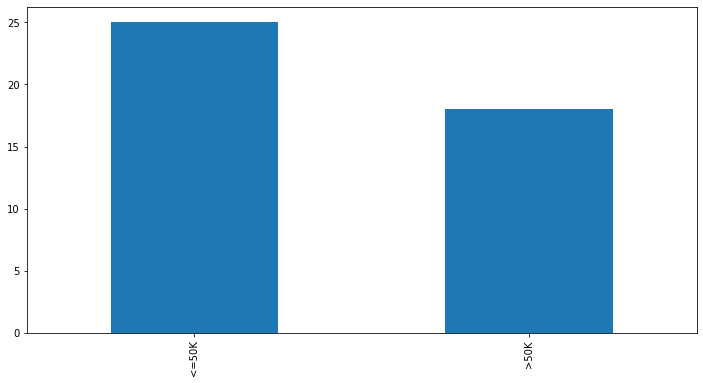

In [77]:
plt.figure(figsize=(12,6))
df.loc[((df["native-country"] == "Iran")), "salary"].value_counts().plot.bar();

---
# Identify the most popular occupation for those who earn >50K in India.
---

In [ ]:
top_IN_occupation =

top_IN_occupation

In [ ]:
df[top_IN_occupation]

In [ ]:
a =  #use mode here
a

In [71]:
print(f"{a} the most popular occupation for those who earn >50K in India.")

NameError: name 'a' is not defined

----
---